In [2]:
import numpy as np
import matplotlib.pyplot as plt

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2

from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.gen_Distribution import Quantile_Lorentzian as Q_Lorentzian

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.get_sec_r import get_r_Fun,get_rp,get_rp2,get_rp3,integrand_Rd3
from scipy import interpolate

import pandas as pd
from tqdm.notebook import tqdm

In [ ]:
seed =11
N = 5000
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
# theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)

omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 6
dt = 0.1
t = np.arange(0,5000,dt)
# K = 5.3
K = 6
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=0*omega,p_omega=omega)

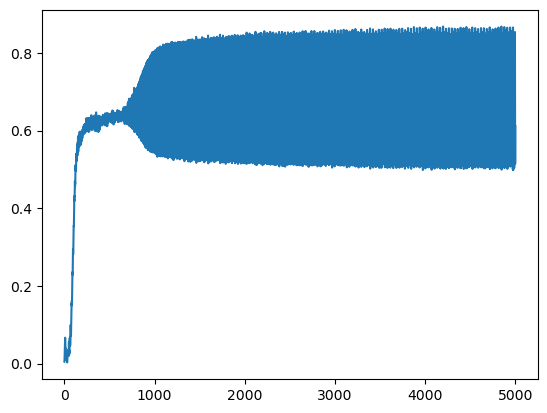

In [414]:
plt.plot(t,rs)

In [415]:
theta_l,dtheta_l = theta[-1],dtheta[-1]
del theta, dtheta

In [416]:
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_l,p_dtheta=dtheta_l,p_omega=omega)

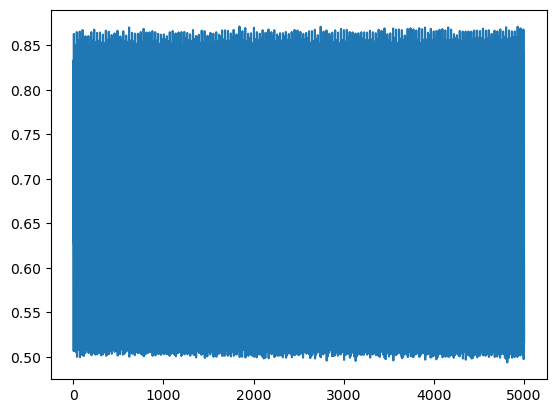

In [417]:
plt.plot(t,rs)

In [418]:
avg_dtheta = (theta[1000:] - theta[0:-1000])/(t[1000]-t[0])

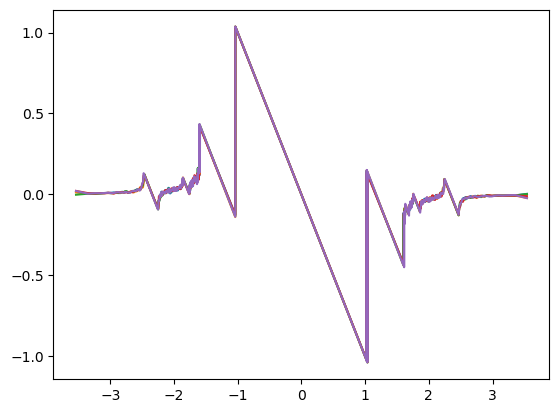

In [419]:
plt.plot(omega,avg_dtheta[1000]-omega)
plt.plot(omega,avg_dtheta[5000]-omega)
plt.plot(omega,avg_dtheta[10000]-omega)
plt.plot(omega,avg_dtheta[20000]-omega)
plt.plot(omega,avg_dtheta[30000]-omega)



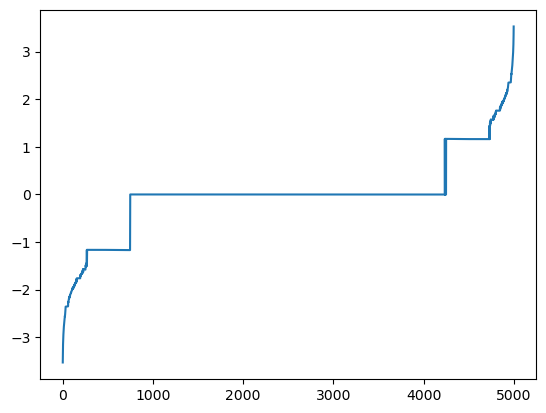

In [420]:
plt.plot((theta[-1] - theta[-500])/(t[-1]-t[-500]))
# plt.plot(v_t)

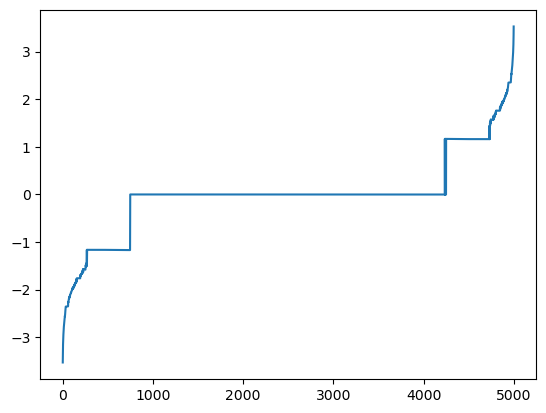

In [421]:
v_t = np.mean(dtheta[-500:],axis=0)
plt.plot(v_t)

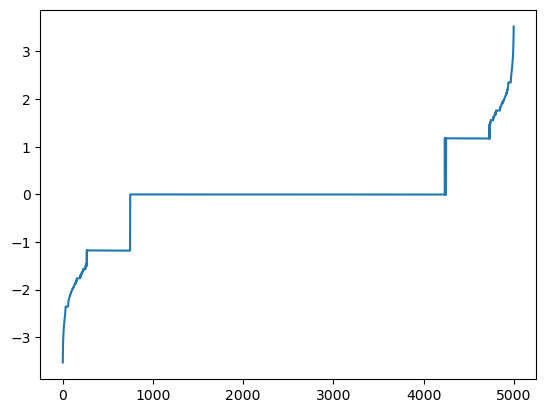

In [422]:
v_t = np.mean(dtheta[-1000:],axis=0)
plt.plot(v_t)
con0 = np.abs(v_t) < 0.1 
c_0, = np.where(con0)
c_p, = np.where(np.logical_and(~con0, omega > 0))
c_m, = np.where(np.logical_and(~con0, omega < 0))

In [423]:
rm = np.mean(rs[-500:])

In [424]:
r0 = np.mean(np.exp(1j*theta[-500:,c_0]),axis=1) * len(c_0)/N
rp_ = np.mean(np.exp(1j*theta[-500:,c_p]),axis=1) * len(c_p)/N
rm_ = np.mean(np.exp(1j*theta[-500:,c_m]),axis=1) * len(c_m)/N

r0_ = np.mean(np.abs(r0))
rp_ = np.mean(np.abs(rp_))
rm_ = np.mean(np.abs(rm_))

In [425]:
Ks = np.arange(0,20,0.1)

F = get_r_Fun(m)
R_0u = F['u']['R0'](Ks)
idx = np.isnan(R_0u)
K_urp = Ks[~idx]
R_0u = R_0u[~idx]
OPS = F['u']['OPS'](K_urp)
_,rp_d,rp_u,rp0_d,rp0_u = get_rp(K_urp,R_0u,OPS,m,MAX=False)

In [426]:
OL = omega * (1 - 1/2 * (K*r0_) **2 /(omega**2 + m**2*omega**4))
OL2 = omega * (1 - 1/2 * (K*rm) **2 /(omega**2 + m**2*omega**4))

In [427]:
OP = F['u']['OPS'](K)
dp =  1/2 *m*K*K*r0_*rp_/(m**2 * OP**2 + 1) + K*K* rp_*rp_/(4*OP*(1+4*OP**2*m**2))

In [428]:
OL3 = (omega -dp) * (1 - 1/2 * (K*rp_) **2 /((omega-dp-OP)**2 + m**2*(omega-dp-OP)**4))
OL4 = (omega) * (1 - 1/2 * (K*rp_) **2 /((omega)**2 + m**2*(omega)**4))


(0.0, 2.0)

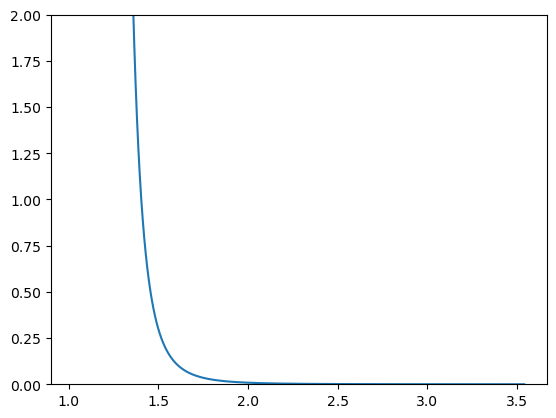

In [429]:
plt.plot(omega[c_p],(1/2 * (K*rp_) **2 /((omega-dp-OP)**2 + m**2*(omega-dp-OP)**4))[c_p])
plt.ylim(0,2)

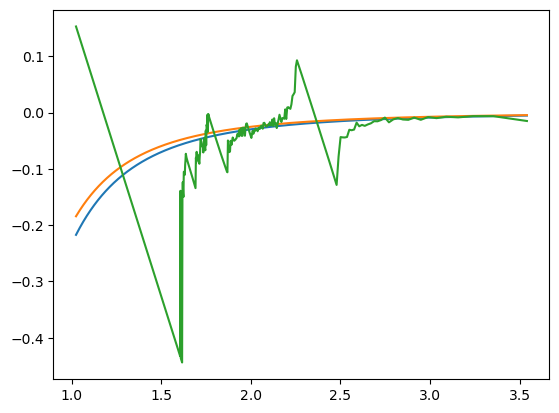

In [430]:
plt.plot(omega[c_p],OL[c_p]-omega[c_p])
plt.plot(omega[c_p],OL2[c_p]-omega[c_p])
plt.plot(omega[c_p],v_t[c_p]-omega[c_p])

Text(0, 0.5, 'difference')

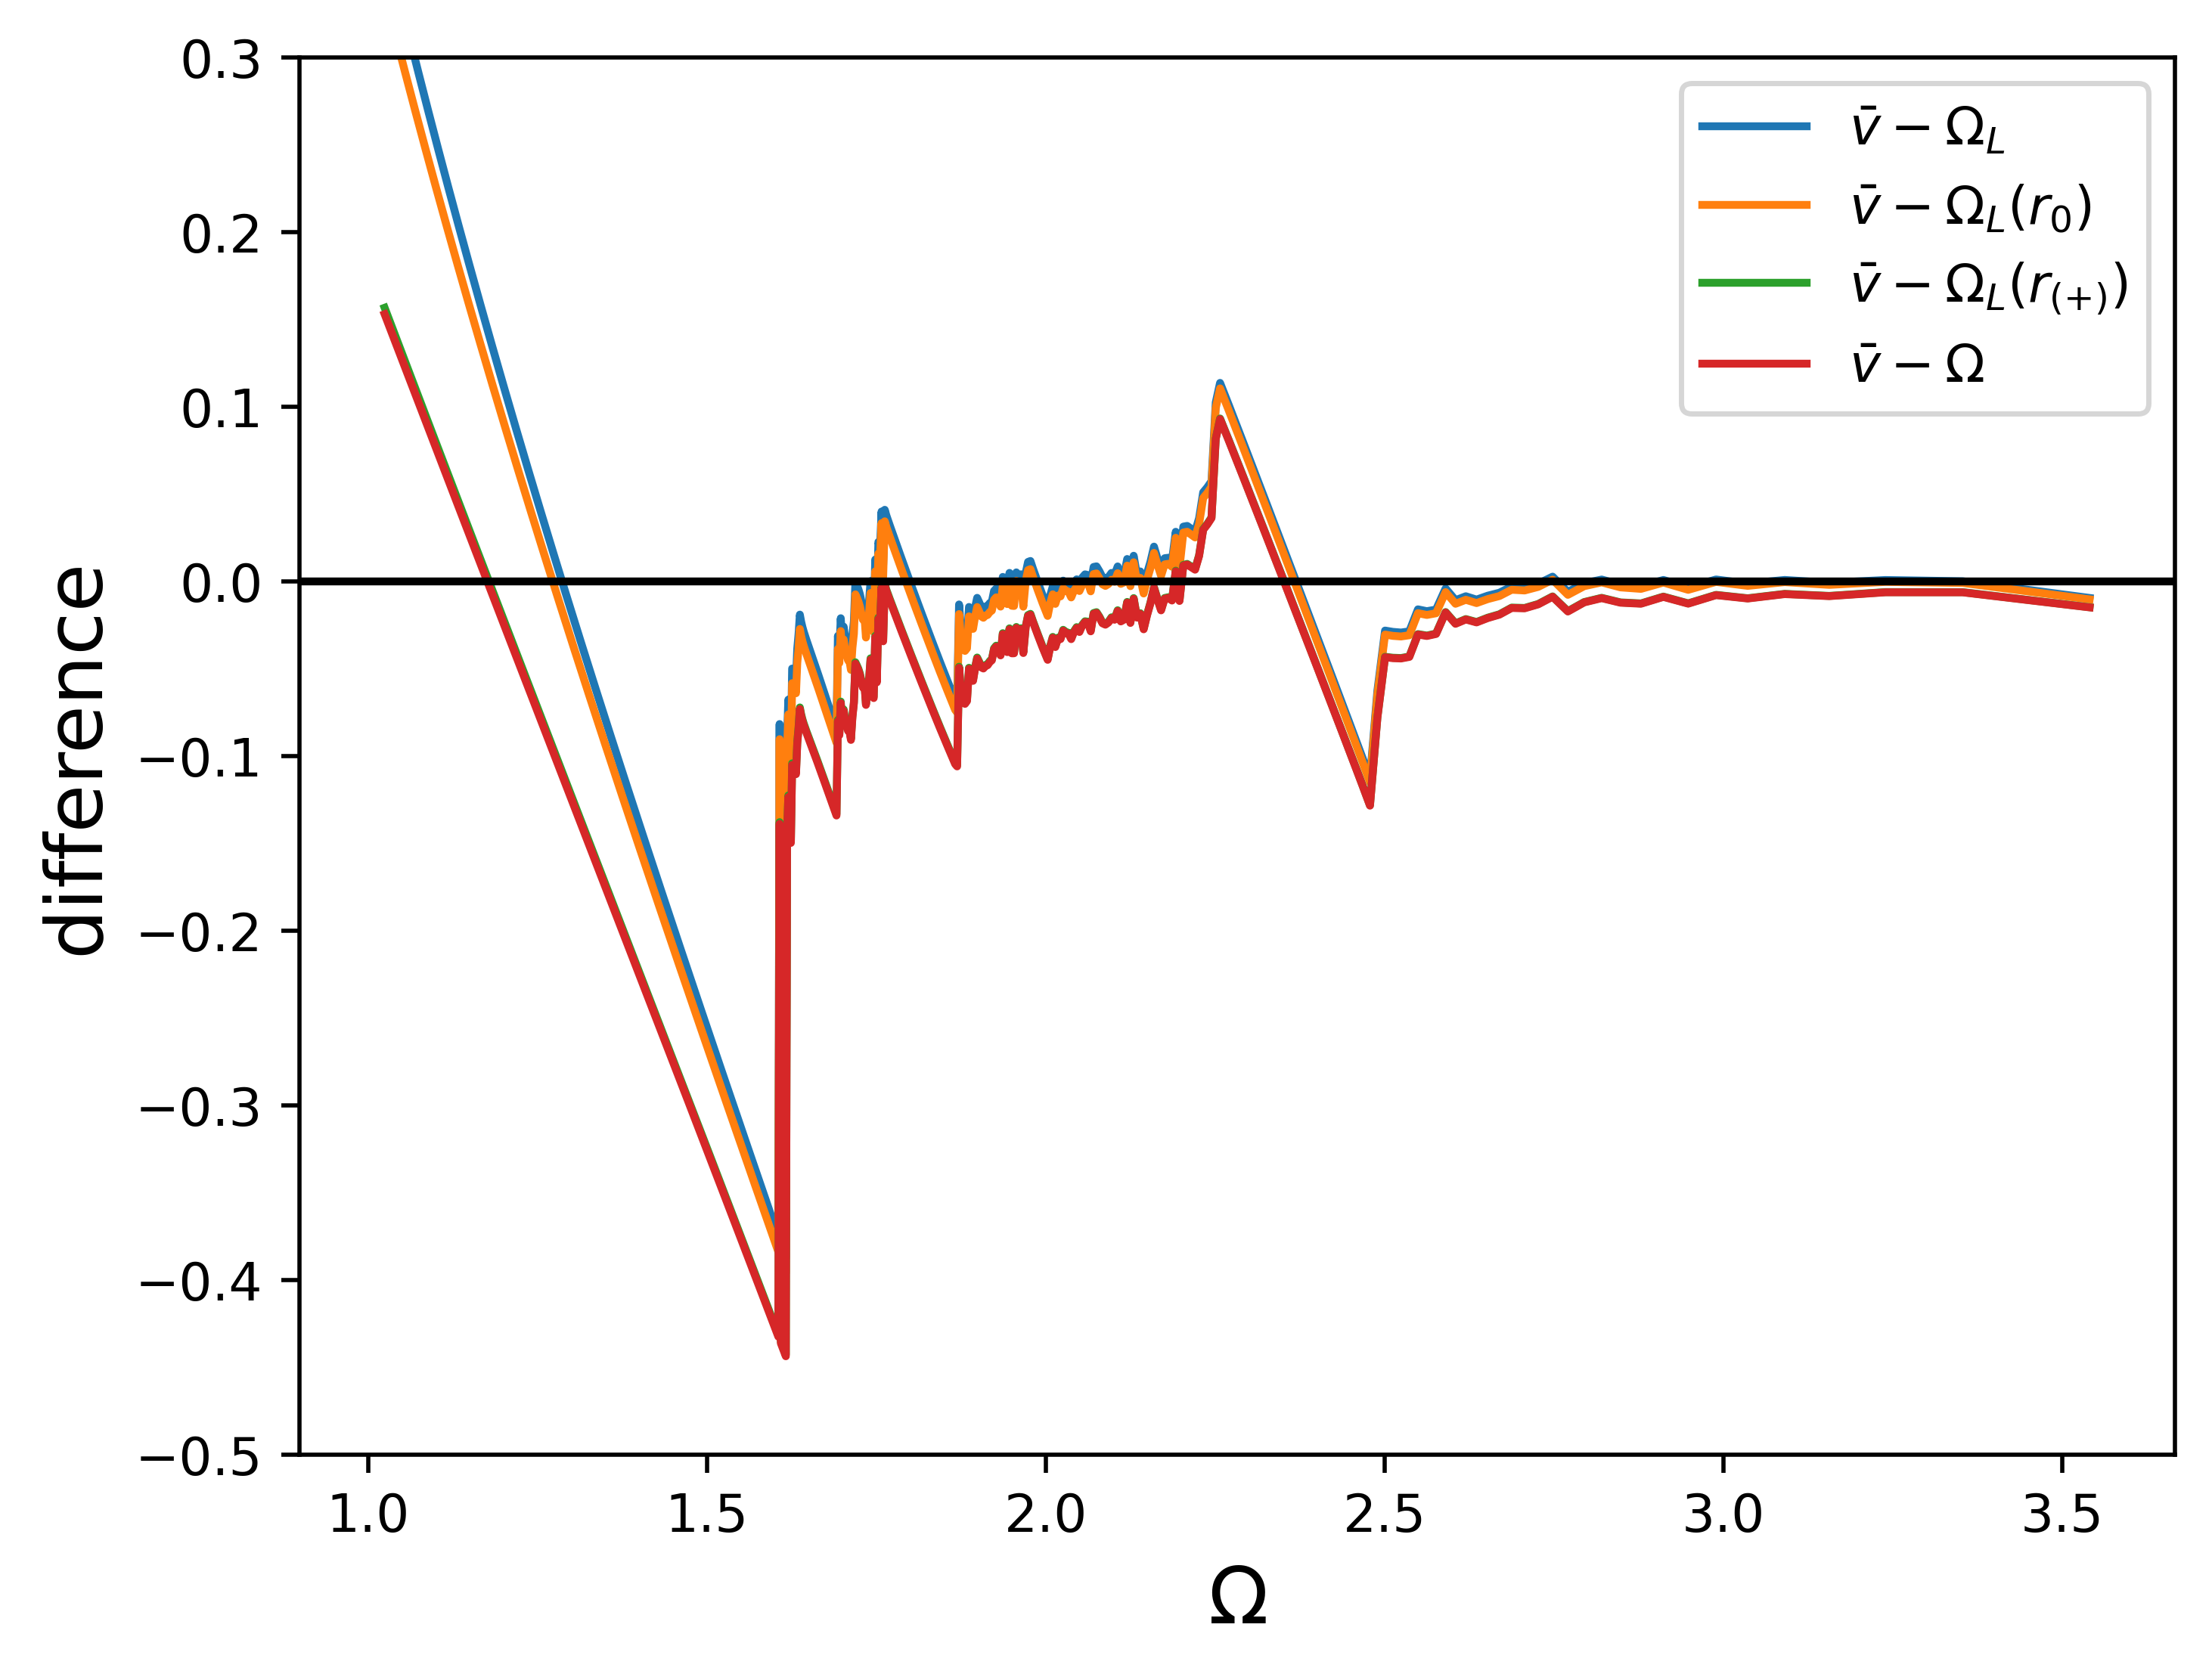

In [432]:
# plt.plot(omega,avg_dtheta[20000])
# plt.plot(omega[c_p],v_t[c_p]-OL2[c_p])
plt.figure(dpi=500)
plt.plot(omega[c_p],v_t[c_p]-OL[c_p],label=r'$\bar{v}-\Omega_L$')
plt.plot(omega[c_p],v_t[c_p]-OL2[c_p],label=r'$\bar{v}-\Omega_L(r_0)$')
# plt.plot(omega[c_p],v_t[c_p]-OL3[c_p],label=r'$\bar{v}-\Omega_L(r_{(+)})$')
plt.plot(omega[c_p],v_t[c_p]-OL4[c_p],label=r'$\bar{v}-\Omega_L(r_{(+)})$')
plt.plot(omega[c_p],v_t[c_p]-omega[c_p],label=r'$\bar{v}-\Omega$')
plt.ylim(-0.5,0.3)
plt.legend()
plt.axhline(0,color='black')
plt.xlabel(r'$\Omega$',fontsize=15)
plt.ylabel(r'difference',fontsize=15)
# plt.plot(-omega[c_m],-avg_dtheta[-1,c_m])
# plt.plot(omega[c_p],OL[c_p])
# plt.plot(omega[c_p],omega[c_p])
# plt.plot(omega[c_p],OL2[c_p])

# plt.axhline(F['u']['OPS'](K))
# plt.axvline(F['u']['OPS'](K))

# plt.axhline(F['u']['OPS'](K)+dp)
# plt.axvline(F['u']['OPS'](K)+dp)
# plt.plot(omega,avg_dtheta[20000])
# plt.ylim(-0.2,0.2)
# plt.plot(OL)

In [321]:
opp = 4/np.pi * np.sqrt(K*rp_/m) - 0.3056/np.sqrt(K*rp_*m**3)

Text(0, 0.5, '$v_t$')

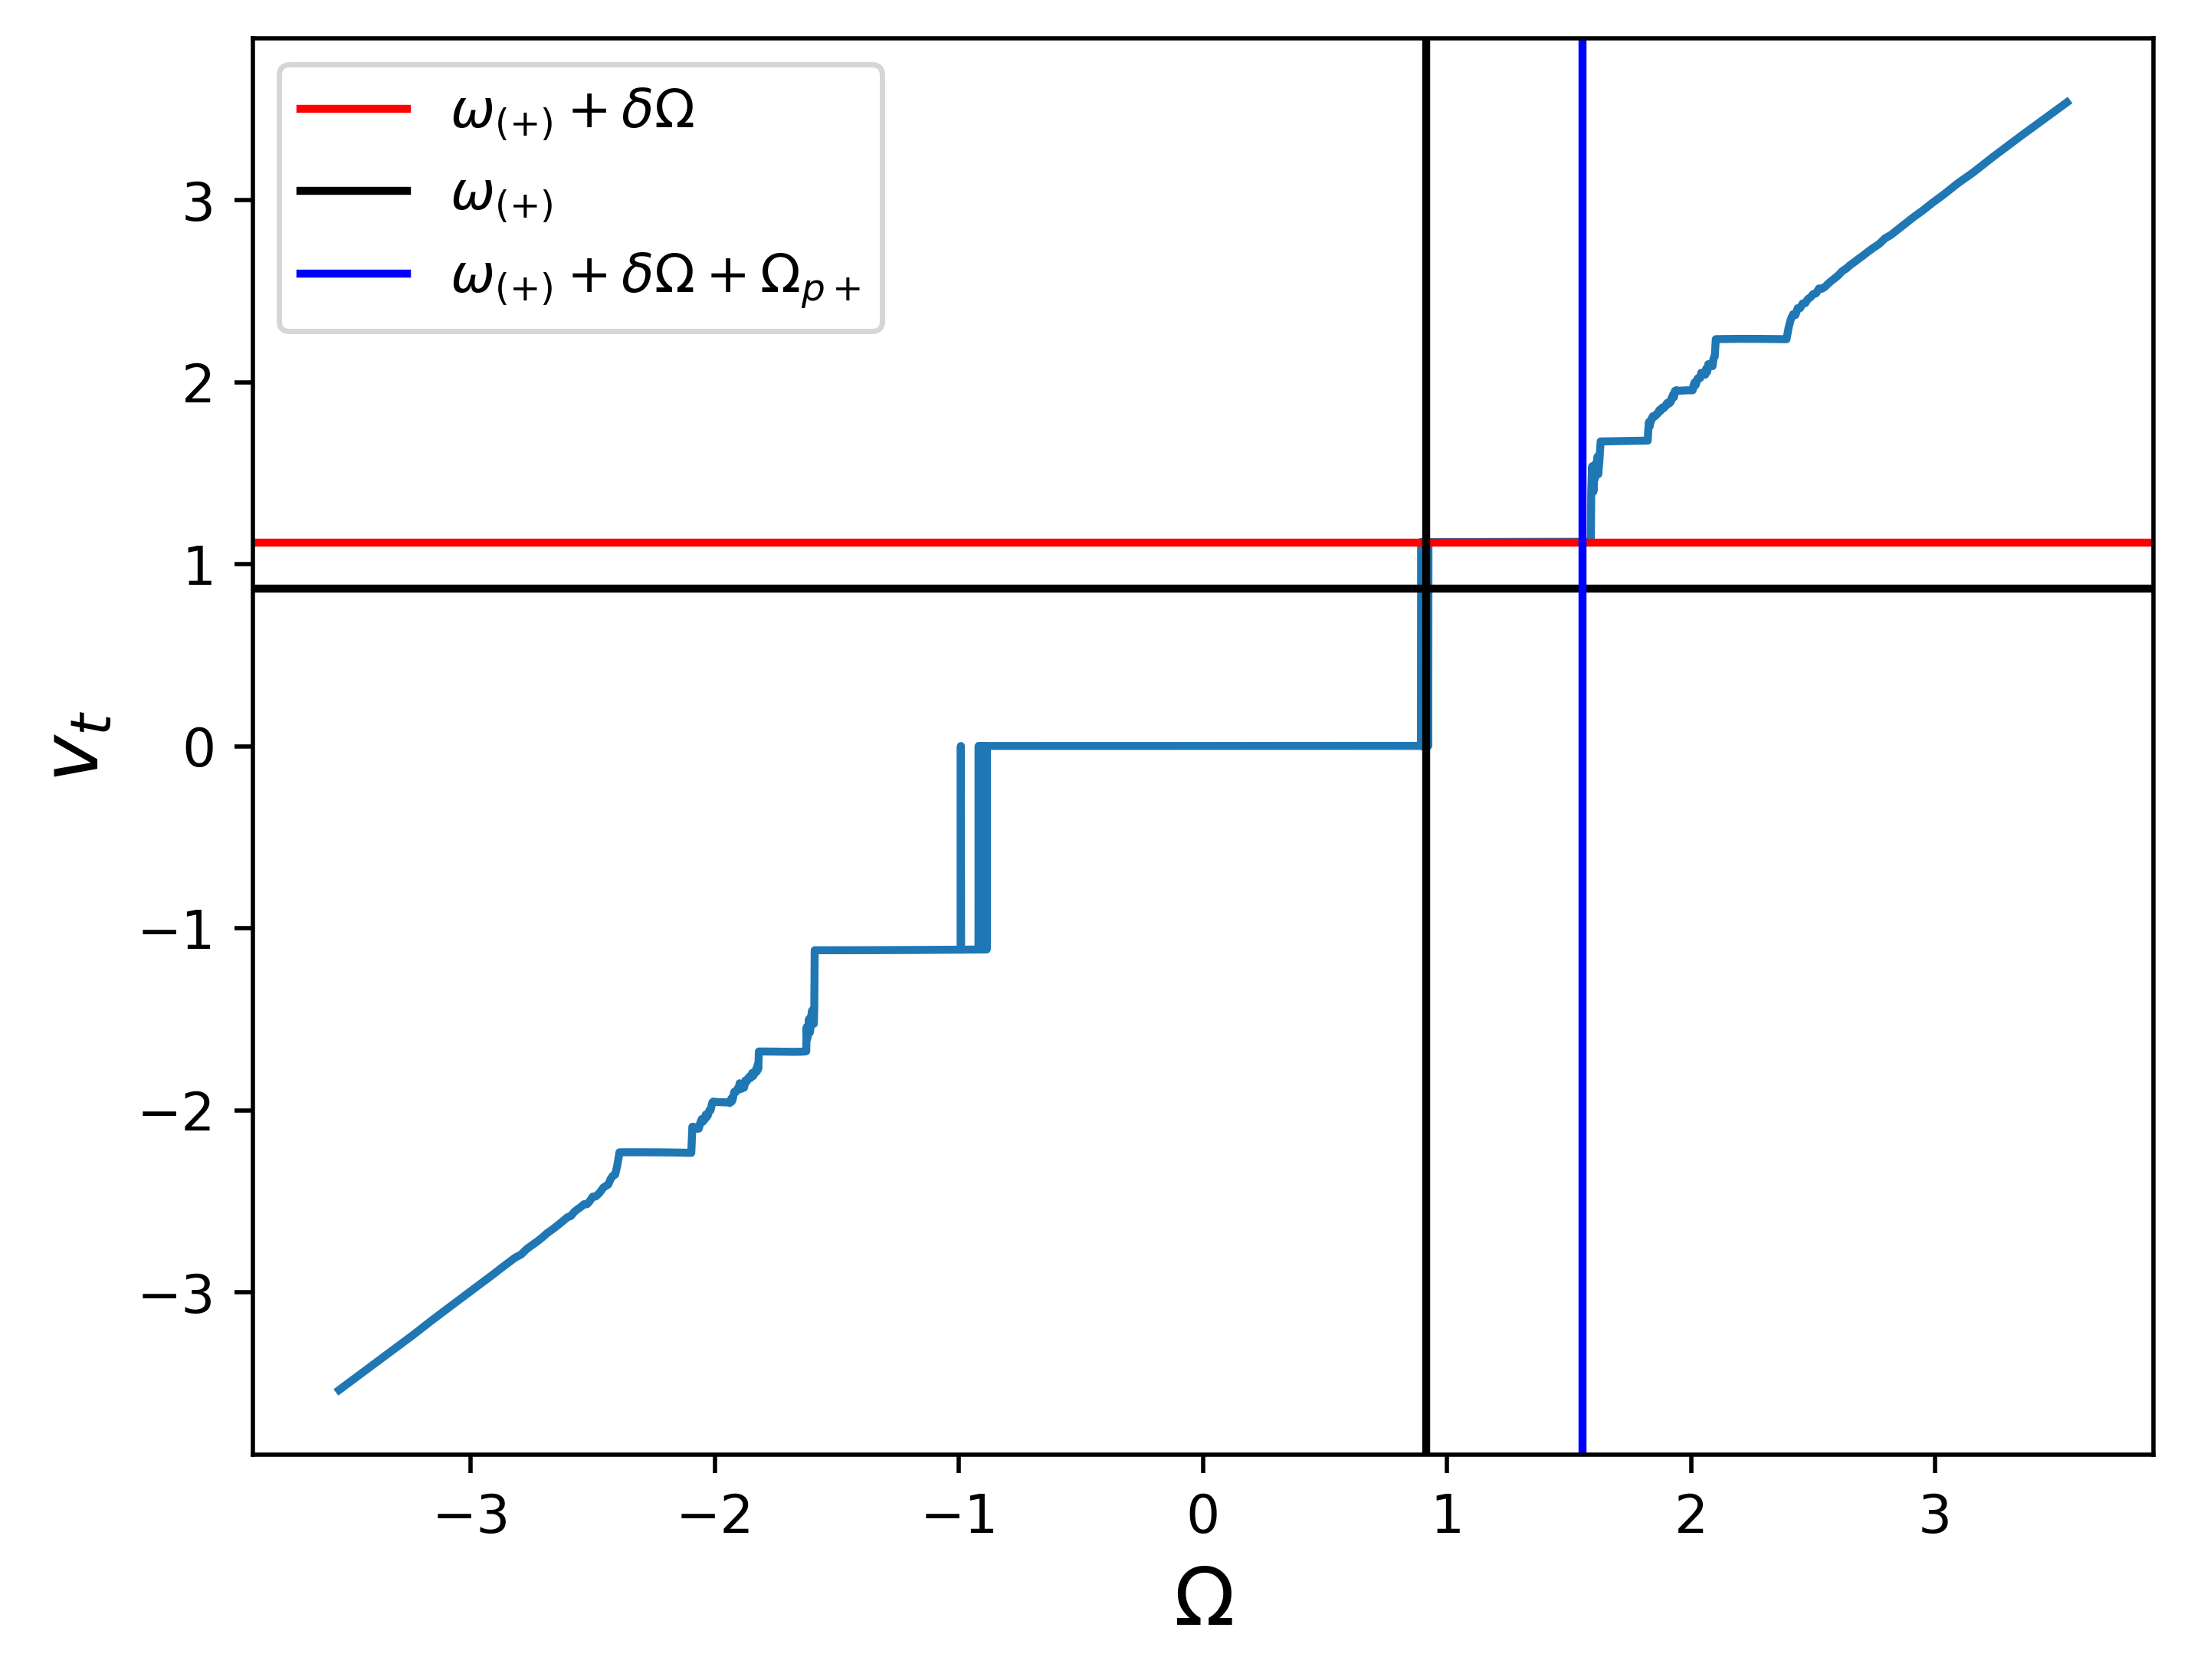

In [323]:
plt.figure(dpi=500)
plt.plot(omega,v_t)
plt.axhline(OP,color='black')
plt.axhline(OP+dp,color='red',label=r'$\omega_{(+)}+\delta\Omega$')
plt.axvline(OP+0.05,color='black',label=r'$\omega_{(+)}$')
plt.axvline(OP+0.05+dp+opp,color='blue',label=r'$\omega_{(+)}+\delta\Omega+\Omega_{p+}$')
plt.legend()
plt.xlabel(r'$\Omega$',fontsize=15)
plt.ylabel(r'$v_t$',fontsize=15)

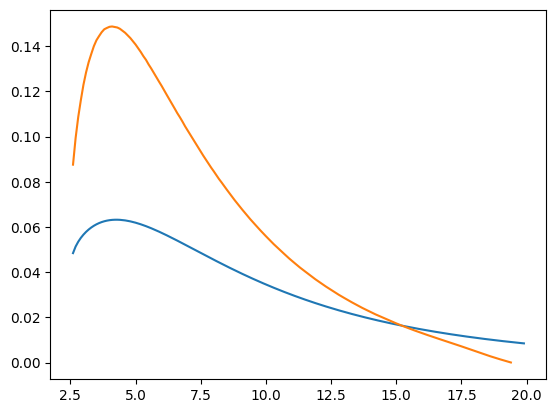

In [162]:
plt.plot(Ks,F['u']['R0'](Ks) - F['u']['R'](Ks))
plt.plot(K_urp,rp_u)
# plt.plot(K_urp,R_0u)

In [152]:
r0_ - F['u']['R0'](K)

0.02532996470579818

In [153]:
OP = np.max(omega[c_0])
# OP = F['u']['OPS'](K)

In [154]:
r0_ - m*K*r0_*rp_/(m**2 * OP**2 + 1) , rm

(0.5586696687793462, 0.5782324341619914)

In [137]:
r0_ - m*K*rp_**2/(m**2 * OP**2 + 1), rm

(0.6179266029355853, 0.5762396967514765)

In [138]:
r0_ - m*K*rm*rp_/(m**2 * OP**2 + 1), rm

(0.5653215032632148, 0.5762396967514765)

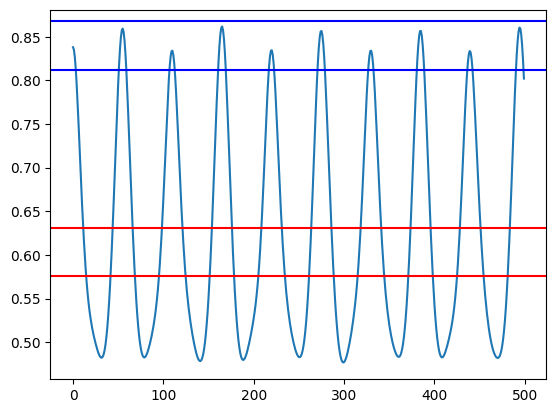

In [217]:
plt.plot(rs[-500:],zorder=-3)
plt.axhline(r0_,color='red')
plt.axhline(rm,color='red')
plt.axhline(rm + rm_*2,color='blue')
plt.axhline(r0_ + rm_*2,color='blue')

# plt.axhline(F['u']['R0'](K),color='blue')
# plt.axhline(F['u']['R'](K),color='green')

(1.1, 1.89)

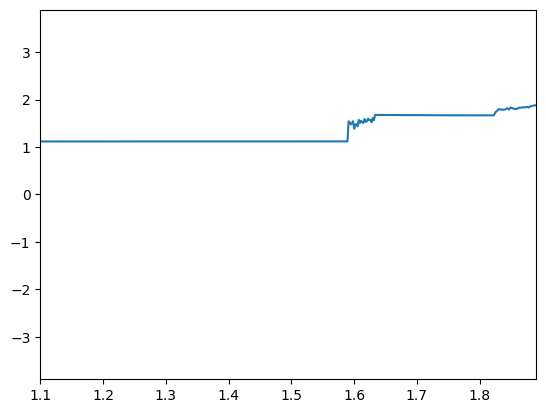

In [188]:
plt.plot(omega,v_t)
plt.axvline(F['u']['OPS'](K))
plt.axvline(-F['u']['OPS'](K))
plt.xlim(1.1,1.89)

In [171]:
RMS = {}
RPS = {}
R0S = {}

In [216]:
KK = [4.5,5,5.5,6,6.5,7,7.5,8]
K_idx = 0

In [218]:
K_idx=7
KK[K_idx],K_idx

(8, 7)

  0%|          | 0/10 [00:00<?, ?it/s]

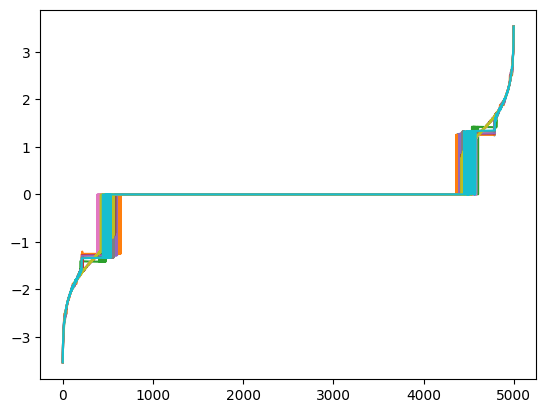

In [219]:
s_rs = {}
s_r0 = {}
s_rm = {}
s_rp = {}
seed = 0
for i in tqdm(range(10)):
    N = 5000
    theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
    # theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)

    omega = omega - np.mean(omega)
    omega = np.sort(omega)
    m = 7
    dt = 0.1
    t = np.arange(0,5000,dt)
    # K = 5.3
    K = KK[K_idx]
    to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
    theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=0*omega,p_omega=omega)
    v_t = np.mean(dtheta[-500:],axis=0)
    plt.plot(v_t)
    con0 = np.abs(v_t) < 0.1 
    c_0, = np.where(con0)
    c_p, = np.where(np.logical_and(~con0, omega > 0))
    c_m, = np.where(np.logical_and(~con0, omega < 0))
    
    r0 = np.mean(np.exp(1j*theta[-500:,c_0]),axis=1) * len(c_0)/N
    rp_ = np.mean(np.exp(1j*theta[-500:,c_p]),axis=1) * len(c_p)/N
    rm_ = np.mean(np.exp(1j*theta[-500:,c_m]),axis=1) * len(c_m)/N

    r0_ = np.mean(np.abs(r0))
    rp_ = np.mean(np.abs(rp_))
    rm_ = np.mean(np.abs(rm_))
    
    s_rs[seed] = rs
    s_r0[seed] = r0_
    s_rp[seed] = rp_
    s_rm[seed] = rm_
    del theta, dtheta
    seed += 1
K_idx +=1

In [220]:
F = get_r_Fun(m)
R_0u = F['u']['R0'](K)
OPS = F['u']['OPS'](K)
_,rp_d,rp_uS,rp0_d,rp0_u = get_rp(K,R_0u,OPS,m,MAX=False)
_,rp2_d,rp2S,rp20_d,rp20_u = get_rp2(K,R_0u,OPS,m,MAX=False)
_,rp2_d,rp3S,rp20_d,rp20_u = get_rp3(K,R_0u,OPS,m,MAX=False)

Text(0.5, 1.0, 'K')

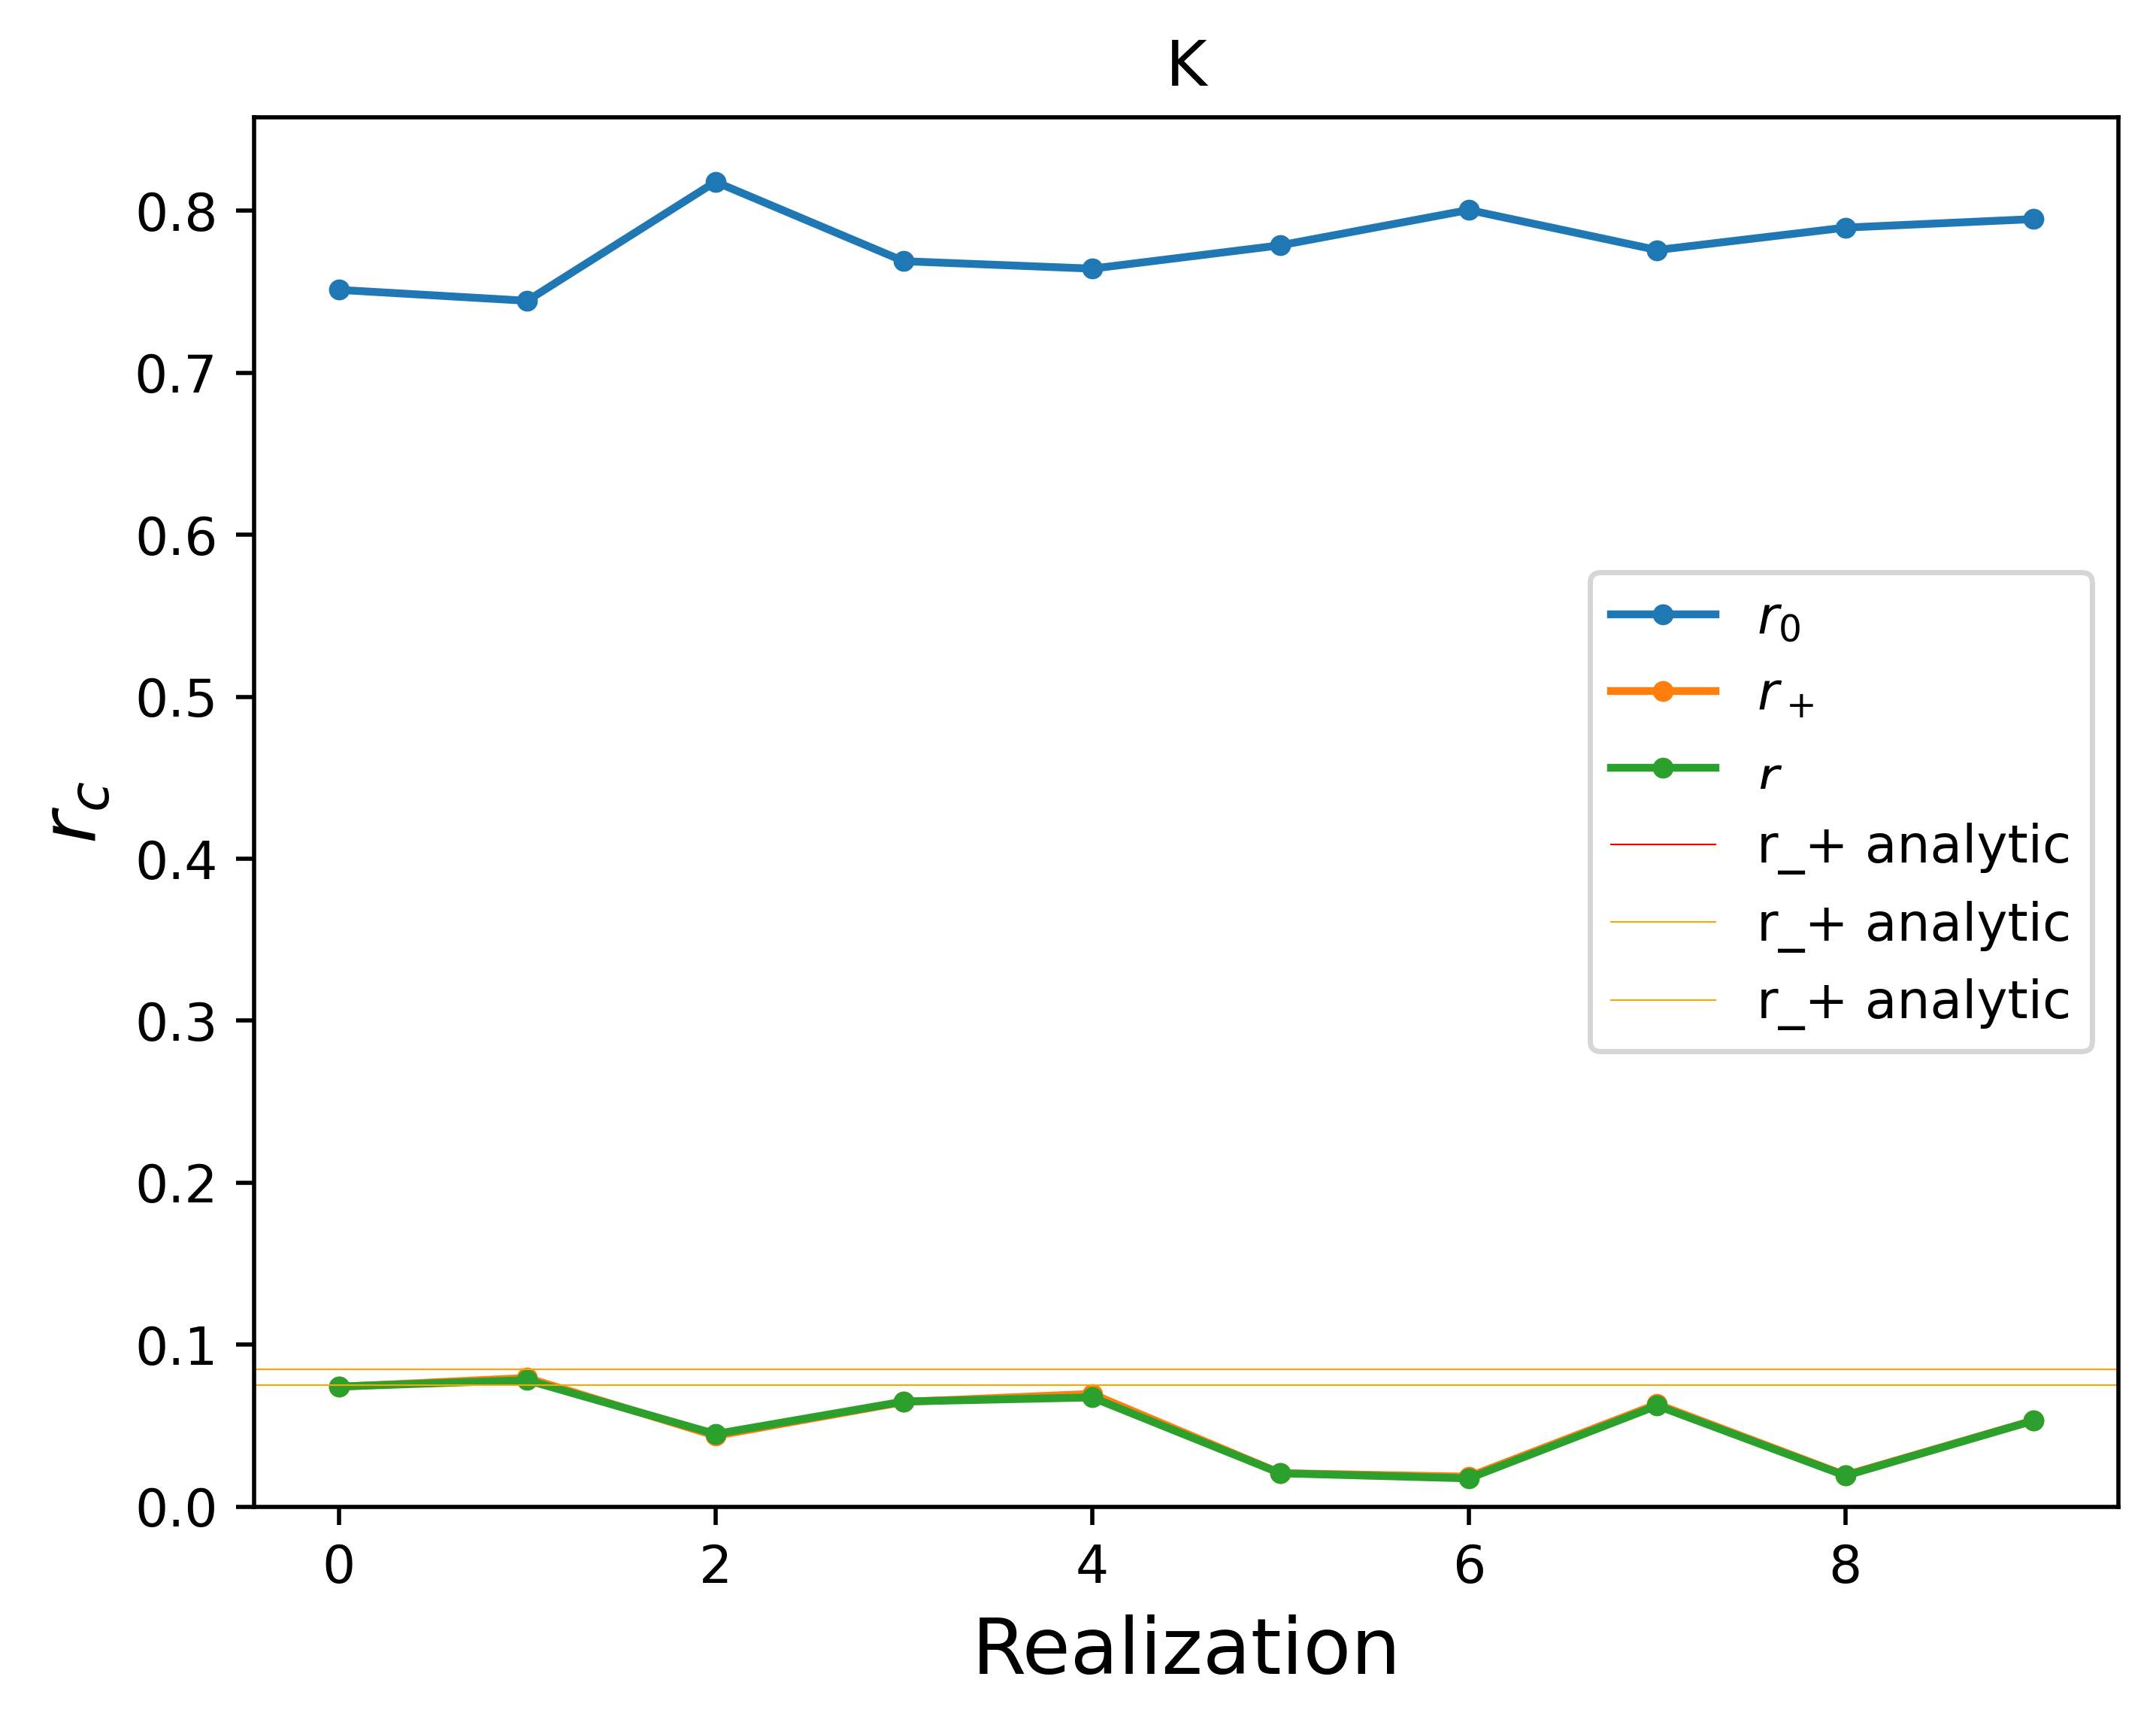

In [224]:
R0 = []
RP = []
RM = []
plt.figure(dpi=500)

for s in range(seed):
    # plt.scatter(s,np.mean(s_rs[s][-5000:]))
    # plt.scatter(s,np.max(s_rs[s][-500:])-np.min(s_rs[s][-500:]))
    R0.append(s_r0[s]) 
    RP.append(s_rp[s]) 
    RM.append(s_rm[s]) 
    # plt.scatter(s,s_r0[s])
    # plt.scatter(s,s_rp[s])
    # plt.scatter(s,s_rm[s])
    
RMS[K] = RM
RPS[K] = RP
R0S[K] = R0
plt.plot(R0,'.-',label=r'$r_0$')
plt.plot(RP,'.-',label=r'$r_+$')
plt.plot(RM,'.-',label=r'$r_-$')
# plt.axhline(R_0u,color='blue',label='r_0 analytic')
plt.axhline(rp_uS, lw = 0.3,color='red',label='r_+ analytic')
plt.axhline(rp2S, lw = 0.3,color='orange',label='r_+ analytic')
plt.axhline(rp3S, lw = 0.3,color='orange',label='r_+ analytic')
plt.xlabel('Realization',fontsize=15)
plt.ylabel(r'$r_c$',fontsize=15)
plt.ylim(0,)
plt.legend()
plt.title('K')

In [176]:
Ks = np.arange(0,20,0.1)

F = get_r_Fun(m)
R_0u = F['u']['R0'](Ks)
idx = np.isnan(R_0u)
K_urp = Ks[~idx]
R_0u = R_0u[~idx]
OPS = F['u']['OPS'](K_urp)
Ks_,rp2_d,rp2,rp20_d,rp20_u = get_rp2(K_urp,R_0u,OPS,m,MAX=False)
Ks_,rp2_d,rp3,rp20_d,rp20_u = get_rp3(K_urp,R_0u,OPS,m,MAX=False)

Text(0, 0.5, '$r_{(+)}$')

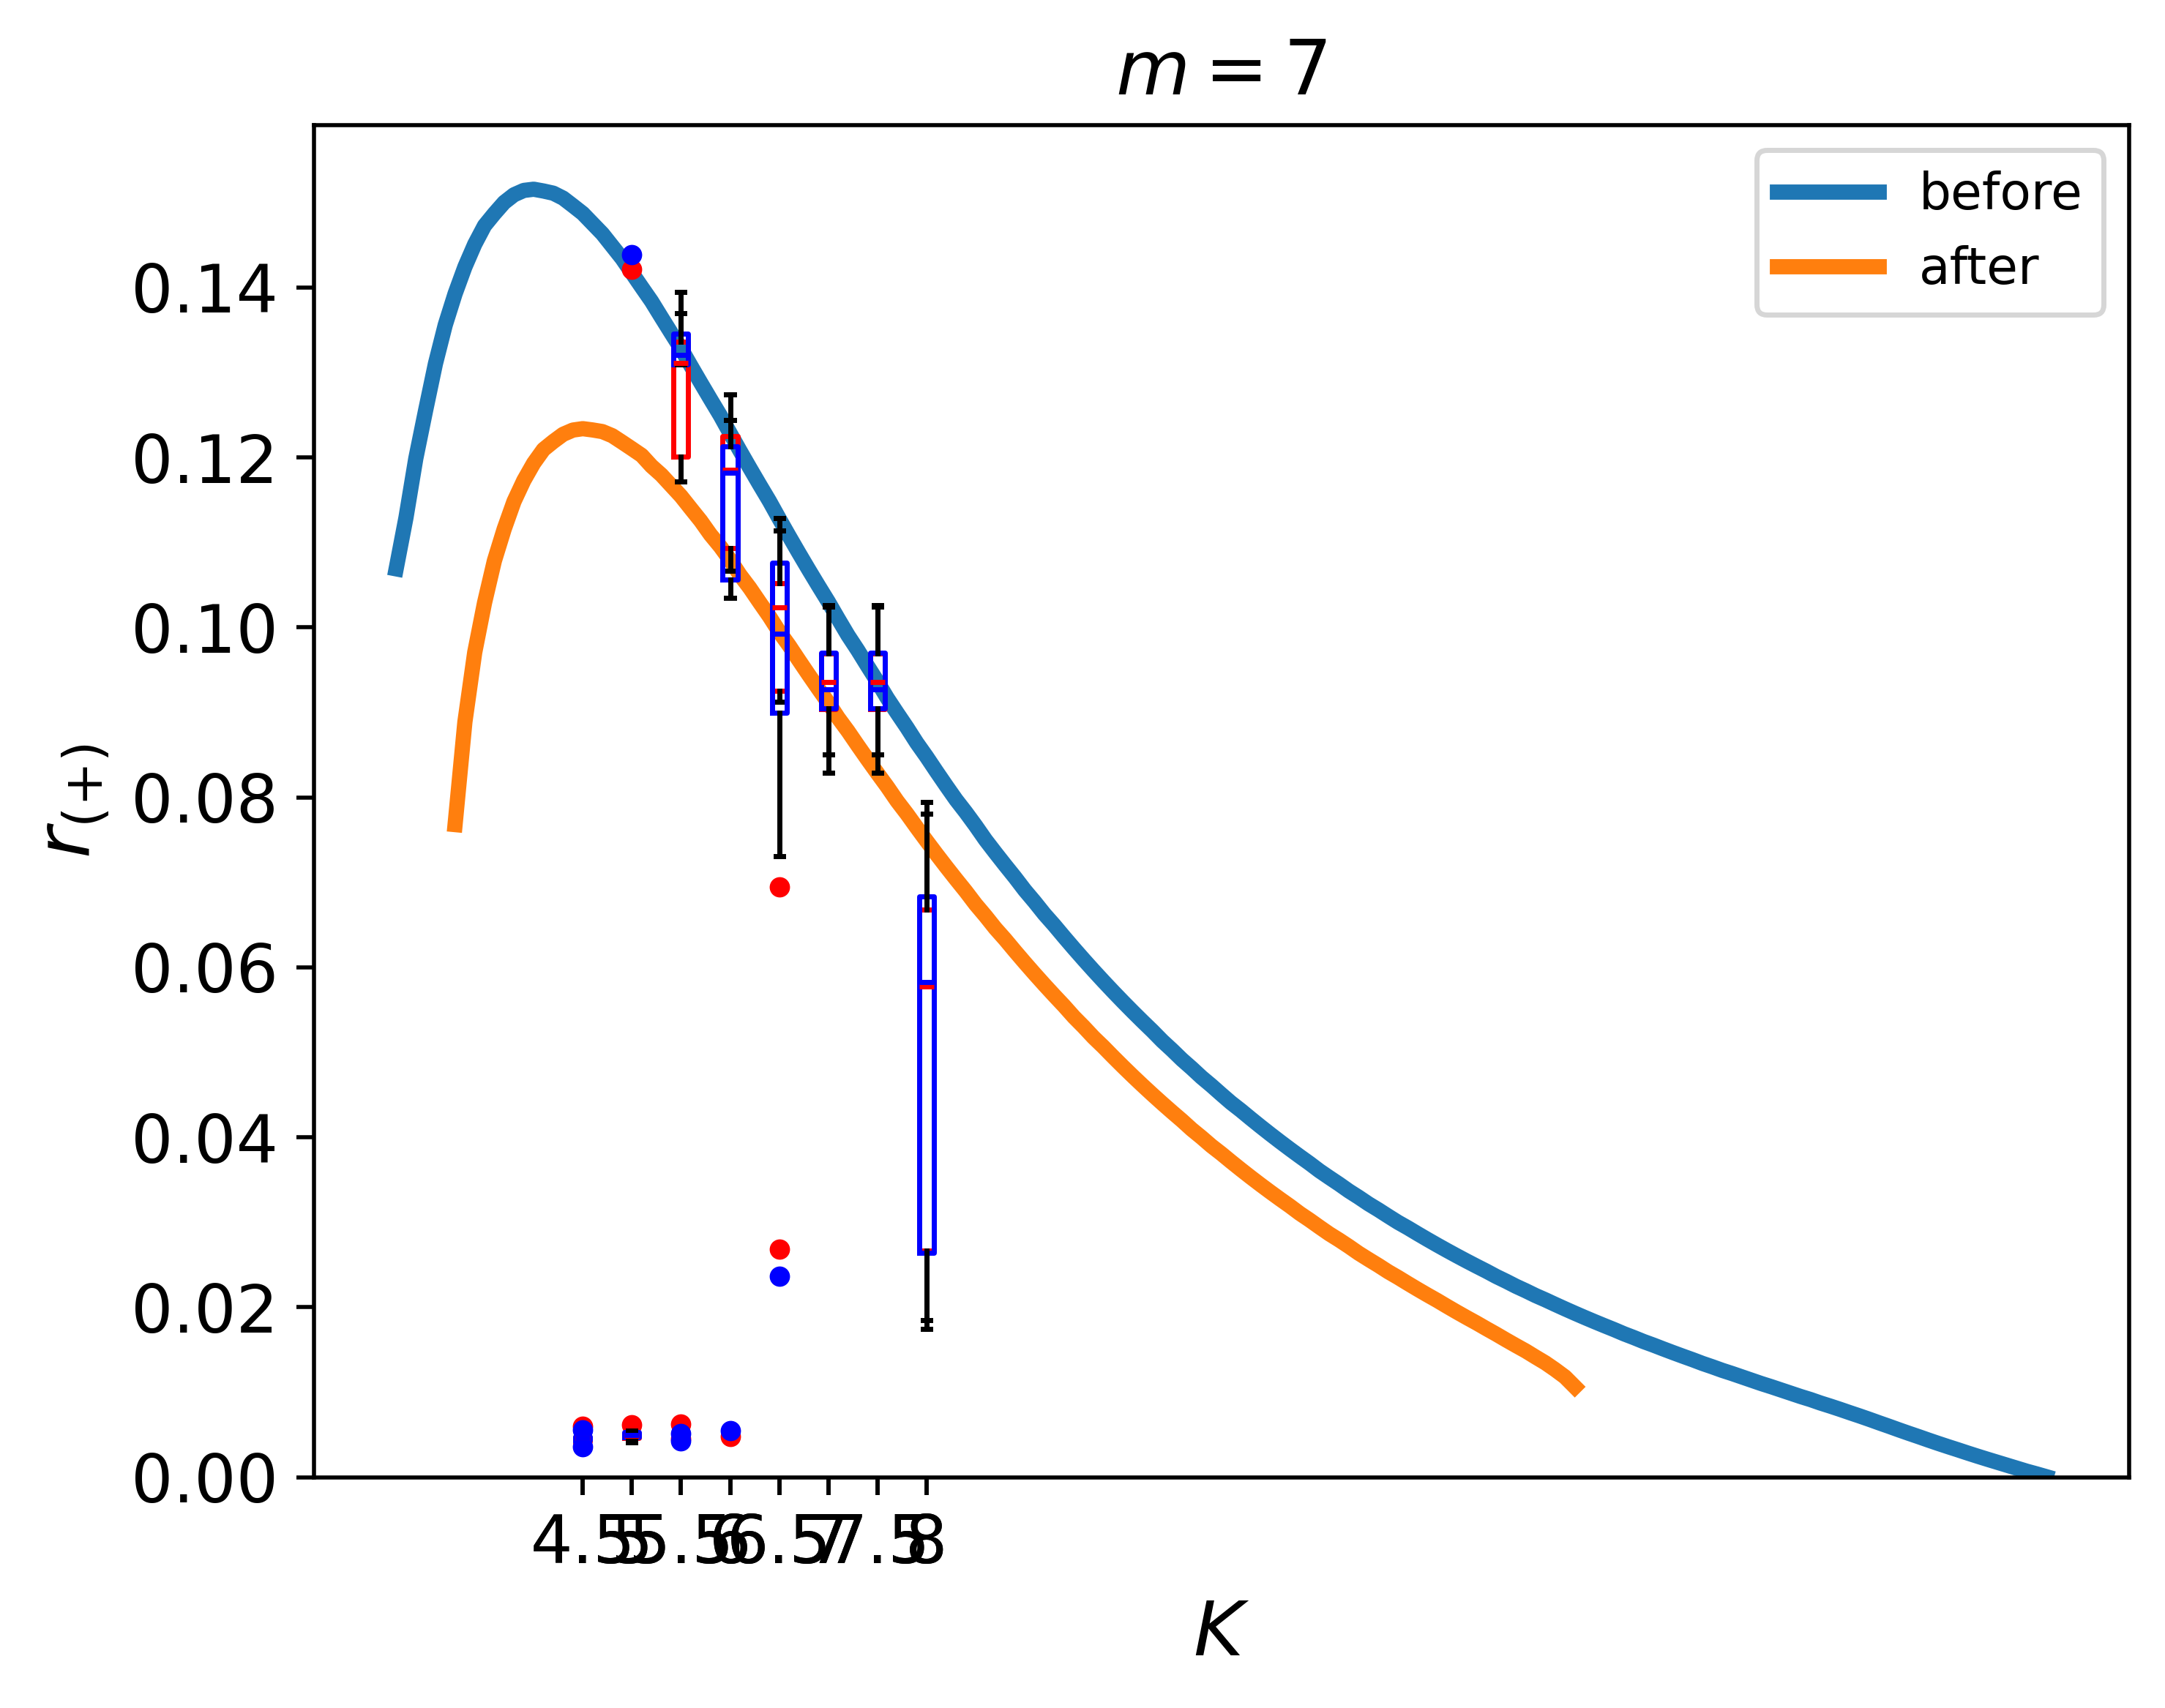

In [225]:
plt.figure(dpi=500)
plt.plot(Ks_,rp2,label=r'before',lw=3,zorder=1)
plt.plot(Ks_,rp3,label=r'after',lw=3,zorder=1)



# plt.scatter(K,rm_,marker='.',color='red')
# plt.scatter(K,rp_,marker='.',color='black',label='simul')
for K in [4.5,5,5.5,6,6.5,7,7.5,8]:
    plt.boxplot(RMS[K], positions=[K], boxprops=dict(color='red'), medianprops=dict(color='red'), flierprops=dict(marker='o', color='red', markersize=3),sym='red')
    plt.boxplot(RPS[K], positions=[K], boxprops=dict(color='blue'), medianprops=dict(color='blue'), flierprops=dict(marker='o', color='blue', markersize=3),sym='blue')
plt.legend()
plt.title(rf'$m={m}$',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0,)

plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$r_{(+)}$',fontsize=15)


In [226]:
np.savez(rf'm={m} secondary cluster',RMS=RMS,RPS=RPS,R0S=R0S,K=[4.5,5,5.5,6,6.5,7,7.5,8])

In [110]:
np.load(rf'm={m} secondary cluster.npz',allow_pickle=True)['RMS']

array({6: [0.09093687173083065, 0.09700921923050884, 0.0960936251739919, 0.08704736159361565, 0.09325839742884813, 0.09549024788230165, 0.09332282617381879, 0.0942744575288569, 0.09367418427980209, 0.09529040441960873], 7: [0.0680916506671455, 0.06018191348110118, 0.06401014276080984, 0.07332630188585339, 0.06828988744715055, 0.0702768429649171, 0.07365919146376285, 0.06787493887827817, 0.061339153590484106, 0.06710970293403526, 0.06577620275526462, 0.06806749302670406, 0.06332241668531167, 0.06435864087564304, 0.0677871236228556, 0.07142950597813028, 0.06832919260787473, 0.07270926978374954, 0.05333001434318325, 0.06795104328754706], 6.5: [0.07274748549097551, 0.08059615098517182, 0.07351791901886338, 0.0784530908513371, 0.0736049534926378, 0.07867998959359172, 0.07192541308210045, 0.08111323852688344, 0.08073334210379525, 0.07089496625541944], 5.5: [0.005702133376422513, 0.10490581875963909, 0.10715728670687513, 0.10481427421901378, 0.10544707797741569, 0.10603745155216895, 0.1107395